In [37]:
%config IPCompleter.greedy=True

In [38]:
import numpy as np
import pylab as plt
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]
MATRIX_SIZE = 8

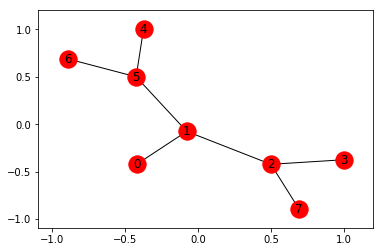

In [39]:
goal = 7
import networkx as nx
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()

In [40]:
R = np.matrix(np.ones(shape=(MATRIX_SIZE,MATRIX_SIZE)))
R *= -1
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

In [41]:
# Setting Rewards

for point in points_list:
    print(point)
    if(point[1]==goal):
        R[point] = 100
    else:
        R[point] = 0
        
    if(point[0] == goal):
        R[point[::-1]] = 100
    else:
        R[point[::-1]] = 0

R[goal, goal] = 100

R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [43]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma, i):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  if (i%70==0):
      print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)
    
# update(initial_state, action, gamma)
Q

matrix([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

max_value 0.0
Score: 0
max_value 0.0
Score: 100.0
max_value 151.14240000000004
Score: 787.9287993391749
max_value 465.6402616320001
Score: 875.08658264356
max_value 490.99280074525905
Score: 942.9691433038206
max_value 495.3883139815727
Score: 958.635162114408
max_value 318.11105340685225
Score: 977.9774562590326
max_value 399.2262874754468
Score: 981.2745106294228
max_value 399.6038591874288
Score: 982.5603556047078
max_value 319.8961540628294
Score: 982.5123892193467
Trained Q matrix:
[[  0.          64.           0.           0.           0.
    0.           0.           0.        ]
 [ 51.19189036   0.          80.           0.           0.
   51.19189036   0.           0.        ]
 [  0.          63.98986295   0.          63.98986295   0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.2          0.           0.        ]
 [ 

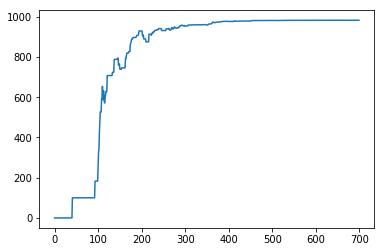

In [44]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma, i)
    scores.append(score)
    if(i%70==0):
        print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

# Version 2.0 with environment

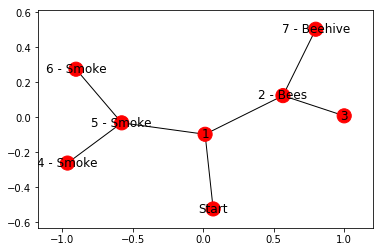

In [45]:
bees = [2]
smoke = [4,5,6]

G=nx.Graph()
G.add_edges_from(points_list)
mapping={0:'Start', 1:'1', 2:'2 - Bees', 3:'3', 4:'4 - Smoke', 5:'5 - Smoke', 6:'6 - Smoke', 7:'7 - Beehive'} 
H=nx.relabel_nodes(G,mapping) 
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H,pos, node_size=[200,200,200,200,200,200,200,200])
nx.draw_networkx_edges(H,pos)
nx.draw_networkx_labels(H,pos)
plt.show()

In [46]:
# re-initialize the matrices for new run
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

enviro_bees = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
enviro_smoke = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
 
initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act
 
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

def collect_environmental_data(action):
    found = []
    if action in bees:
        found.append('b')

    if action in smoke:
        found.append('s')
    return (found)
 
available_act = available_actions(initial_state) 
 
action = sample_next_action(available_act)

def update(current_state, action, gamma):
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  environment = collect_environmental_data(action)
  if 'b' in environment: 
    enviro_bees[current_state, action] += 1
  
  if 's' in environment: 
    enviro_smoke[current_state, action] += 1
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state,action,gamma)

scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)

# print environmental matrices
print('Bees Found')
print(enviro_bees)
print('Smoke Found')
print(enviro_smoke)

max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 100.0
max_value 100.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 80.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 180.0
max_value 80.0
max_value 64.0
max_value 244.0
max_value 295.20000000000005
max_value 64.0
max_value 64.0
max_value 51.2
max_value 51.2
max_value 80.0
max_value 64.0
max_value 80.0
max_value 51.2
max_value 40.96000000000001
max_value 51.2
max_value 51.2
max_value 336.1600000000001
max_value 51.2
max_value 368.92800000000005
max_value 295.14240000000007
max_value 295.14240000000007
max

max_value 0.0
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
going from: [1 4 6]
to: [1]
max_value 0.0
Score: nan
max_value 0.0
Score: nan
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 180.0
Score: 155.55555555555554
max_value 0.0
Score: 155.55555555555554
max_value 0.0
Score: 155.55555555555554
max_value 0.0
Score: 155.55555555555554
max_value 0.0
Score: 155.55555555555554
max_value 0.0
Score: 155.55555555555554
max_value 0.0
Score: 155.55555555555554
going from: [0 2 5]
to: [0 2]
max_value 144.0
Score: 235.55555555555554
going from: [0 2 5]
to: [0 2]
max_value 144.0
Score: 235.55555555555554
going from: [0 2 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


to: [0 2]
max_value 249.58687413062455
Score: 838.9477584887654
going from: [0 2 5]
to: [0 2]
max_value 391.98359266328066
Score: 839.3567759826994
max_value 313.58687413062455
Score: 840.0930074717807
max_value 247.98359266328063
Score: 840.0930074717807
max_value 247.98359266328063
Score: 840.0930074717807
going from: [1 4 6]
to: [1]
max_value 313.58687413062455
Score: 840.829238960862
max_value 250.86949930449964
Score: 841.418224152127
going from: [0 2 5]
to: [0 2]
max_value 391.98359266328066
Score: 841.418224152127
max_value 250.86949930449964
Score: 842.007209343392
going from: [0 2 5]
to: [0 2]
max_value 391.98359266328066
Score: 842.007209343392
max_value 250.86949930449964
Score: 842.007209343392
max_value 313.58687413062455
Score: 842.3344233385392
max_value 313.58687413062455
Score: 842.6616373336864
max_value 489.97949082910077
Score: 842.6616373336864
max_value 250.86949930449964
Score: 842.6616373336864
max_value 313.58687413062455
Score: 842.6616373336864
max_value 250.

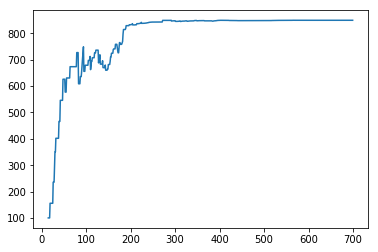

In [52]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# subtract bees with smoke, this gives smoke a negative effect
enviro_matrix = enviro_bees - enviro_smoke

# Get available actions in the current state
available_act = available_actions(initial_state) 

# Sample next action to be performed
action = sample_next_action(available_act)

# This function updates the Q matrix according to the path selected and the Q 
# learning algorithm
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'b' in environment: 
        enviro_matrix[current_state, action] += 1
    if 's' in environment: 
        enviro_matrix[current_state, action] -= 1

    return(np.sum(Q/np.max(Q)*100))

update(initial_state,action,gamma)

enviro_matrix_snap = enviro_matrix.copy()

def available_actions_with_enviro_help(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    # if there are multiple routes, dis-favor anything negative
    env_pos_row = enviro_matrix_snap[state,av_act]
    if (np.sum(env_pos_row < 0)):
        # can we remove the negative directions from av_act?
        temp_av_act = av_act[np.array(env_pos_row)[0]>=0]
        if len(temp_av_act) > 0:
            print('going from:',av_act)
            print('to:',temp_av_act)
            av_act = temp_av_act
    return av_act

# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions_with_enviro_help(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
 

plt.plot(scores)
plt.show()